In [28]:
import pandas as pd

In [29]:
dftrain1 = pd.read_csv('train.csv')
dftest1 = pd.read_csv('test.csv')

#Know Your Data

In [30]:
dftrain1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [31]:
dftest1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [32]:
dftrain1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [33]:
dftest1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


#Data Preprocessing
- Handling Null Values
- Check Duplicates
- Feature Engineering
- Converting data types
- Encoding
- Scaling

In [34]:
dftrain=dftrain1.copy()
dftest=dftest1.copy()

Check for any Duplicate data

In [35]:
dftrain.duplicated().any()

False

Feature Engineering

In [36]:
dftrain[['Deck', 'Side']] = dftrain['Cabin'].str.split('/', expand=True).iloc[:, [0, 2]]
dftrain.drop(columns=['Cabin', 'PassengerId','Name'], inplace=True)

In [37]:
dftest[['Deck', 'Side']] = dftest['Cabin'].str.split('/', expand=True).iloc[:, [0, 2]]
dftest.drop(columns=['Cabin', 'PassengerId','Name'], inplace=True)

In [38]:
bill_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
dftrain['amt_spent'] = dftrain[bill_cols].sum(axis=1)
dftrain['std_amt_spent'] = dftrain[bill_cols].std(axis=1)
dftrain['mean_amt_spent'] = dftrain[bill_cols].mean(axis=1)

In [39]:
dftest['amt_spent'] = dftest[bill_cols].sum(axis=1)
dftest['std_amt_spent'] = dftest[bill_cols].std(axis=1)
dftest['mean_amt_spent'] = dftest[bill_cols].mean(axis=1)

In [40]:
# Display column summary for dftrain
summary = dftrain.isnull().sum().reset_index()
summary.columns = ['Column Name', 'Null Values']
summary['Data Type'] = dftrain.dtypes.values
summary['Unique Values'] = dftrain.nunique().values
summary['Percentage of Null Values'] = (summary['Null Values'] / len(dftrain)) * 100

# Rearrange columns for better readability
summary = summary[['Column Name', 'Data Type', 'Unique Values', 'Null Values', 'Percentage of Null Values']]

In [41]:
summary

,Column Name,Data Type,Unique Values,Null Values,Percentage of Null Values
0,HomePlanet,object,3,201,2.312205
1,CryoSleep,object,2,217,2.496261
2,Destination,object,3,182,2.093639
3,Age,float64,80,179,2.059128
4,VIP,object,2,203,2.335212
5,RoomService,float64,1273,181,2.082135
6,FoodCourt,float64,1507,183,2.105142
7,ShoppingMall,float64,1115,208,2.392730
8,Spa,float64,1327,183,2.105142
9,VRDeck,float64,1306,188,2.162660


In [42]:
for column in dftrain.columns:
    print(f"Column: {column}")
    print(dftrain[column].value_counts())
    print("-" * 50)

Column: HomePlanet
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
--------------------------------------------------
Column: CryoSleep
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
--------------------------------------------------
Column: Destination
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
--------------------------------------------------
Column: Age
Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64
--------------------------------------------------
Column: VIP
VIP
False    8291
True      199
Name: count, dtype: int64
--------------------------------------------------
Column: RoomService
RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1


Convert Datatype Object to Category

In [43]:
dftrain[dftrain.select_dtypes(include='object').columns] = dftrain.select_dtypes(include='object').apply(lambda x: x.astype('category'))

In [44]:
dftest[dftest.select_dtypes(include='object').columns] = dftest.select_dtypes(include='object').apply(lambda x: x.astype('category'))

Encoding

In [45]:
dftrain = pd.get_dummies(dftrain, columns=dftrain.select_dtypes(include='category').columns, drop_first=True)

In [46]:
dftest = pd.get_dummies(dftest, columns=dftest.select_dtypes(include='category').columns, drop_first=True)

In [47]:
dftest.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,amt_spent,std_amt_spent,mean_amt_spent,HomePlanet_Europa,...,Destination_TRAPPIST-1e,VIP_True,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,False,...,True,False,False,False,False,False,False,True,False,True
1,19.0,0.0,9.0,0.0,2823.0,0.0,2832.0,1261.483769,566.4,False,...,True,False,False,False,False,False,True,False,False,True
2,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,True,...,False,False,False,True,False,False,False,False,False,True
3,38.0,0.0,6652.0,0.0,181.0,585.0,7418.0,2899.083700,1483.6,True,...,True,False,False,True,False,False,False,False,False,True
4,20.0,10.0,0.0,635.0,0.0,0.0,645.0,282.895741,129.0,False,...,True,False,False,False,False,False,True,False,False,True


Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
train1 = dftrain.drop(columns=['Transported'])
y = dftrain['Transported']

In [50]:
scaler = MinMaxScaler()

# Scale dftrain and dftest
dftrain_scaled = scaler.fit_transform(train1)
dftest_scaled = scaler.transform(dftest)

Imputing null values

In [51]:
dftrain_scaled = pd.DataFrame(dftrain_scaled, columns=train1.columns)
dftest_scaled = pd.DataFrame(dftest_scaled, columns=dftest.columns)

In [52]:
from sklearn.impute import KNNImputer

In [53]:
# Initialize KNNImputer with k=3
imputer = KNNImputer(n_neighbors=3)

# Perform imputation on dftrain_scaled and dftest_scaled
dftrain_scaled = imputer.fit_transform(dftrain_scaled)
dftest_scaled = imputer.transform(dftest_scaled)

In [54]:
dftrain_scaled = pd.DataFrame(dftrain_scaled, columns=train1.columns)
dftest_scaled = pd.DataFrame(dftest_scaled, columns=dftest.columns)

Check Class Imbalance

In [55]:
import matplotlib.pyplot as plt

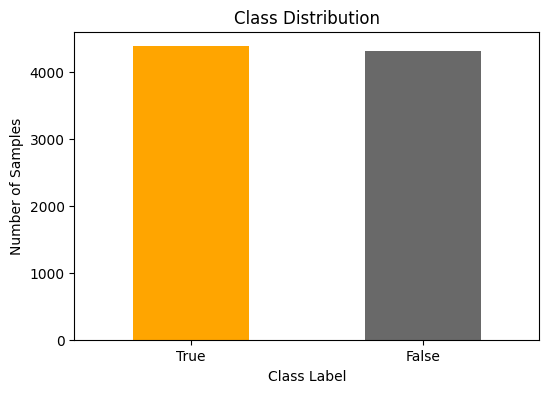

Class Ratio (Majority / Minority): 1.01


In [56]:
# Count class frequencies
class_counts = y.value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['orange', 'dimgrey'])
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Print class ratio (optional)
print(f"Class Ratio (Majority / Minority): {class_counts.iloc[0] / class_counts.iloc[1]:.2f}")

#Modeling

In [57]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [58]:
# Splitting features and target from dftrain_scaled
X = dftrain_scaled

In [59]:
# Define models to compare
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store mean accuracy for each model
model_scores = {}

for name, model in models.items():
    print(f"Training {name}...")
    accuracies = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Train model
        model.fit(X_train, y_train)

        # Predict and calculate accuracy
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        accuracies.append(acc)

    # Store mean accuracy
    model_scores[name] = np.mean(accuracies)
    print(f"{name} Mean Accuracy: {model_scores[name]:.4f}")

# Identify the best model
best_model_name = max(model_scores, key=model_scores.get)
print(f"\nBest Model: {best_model_name} with Mean Accuracy: {model_scores[best_model_name]:.4f}")


Training LogisticRegression...
LogisticRegression Mean Accuracy: 0.7682
Training RandomForest...
RandomForest Mean Accuracy: 0.7944
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:02:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:02:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:02:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:02:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:02:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Mean Accuracy: 0.8009
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2155
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And i

In [60]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [-1, 10, 20],
        'num_leaves': [31, 40, 50],
        'subsample': [0.8, 1.0]
    }
best_model = LGBMClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(best_model, param_grid, cv=skf, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X, y)

# Best parameters and model
final_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Fitting the best model

In [61]:
# Predict on dftest_scaled
final_predictions = final_model.predict(dftest_scaled)

# Prepare submission file
submission = pd.DataFrame({
    'PassengerId': dftest1['PassengerId'],  # Include from original test dataset
    'Transported': final_predictions
})

# Convert Transported to boolean as required by competition rules
submission['Transported'] = submission['Transported'].astype(bool)

# Save submission
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'


In [62]:
'''from google.colab import files
files.download('submission.csv')'''

"from google.colab import files\nfiles.download('submission.csv')"